In [55]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')
data = pd.concat([df, test]).drop('Unnamed: 0',1)
data.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [57]:
df.tail()

Unnamed: 0            drugName              condition  \
161292      191035             Campral     Alcohol Dependence   
161293      127085      Metoclopramide        Nausea/Vomiting   
161294      187382             Orencia   Rheumatoid Arthritis   
161295       47128  Thyroid desiccated    Underactive Thyroid   
161296      215220        Lubiprostone  Constipation, Chronic   

                                                   review  rating  \
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116

In [58]:
df.shape

(161297, 7)

# Dropping null values

In [59]:
df = df.dropna(axis=0)
df.shape

(160398, 7)

In [60]:
df = df.reset_index().drop(['index','Unnamed: 0'],1)

# Dropping drugs with only one condition

In [61]:
df_condition = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
all_list = set(df.index)
condition_list = []
for i,j in enumerate(df['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

# Word Cloud

In [62]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [63]:
stops = set(stopwords.words('english'))
#stops

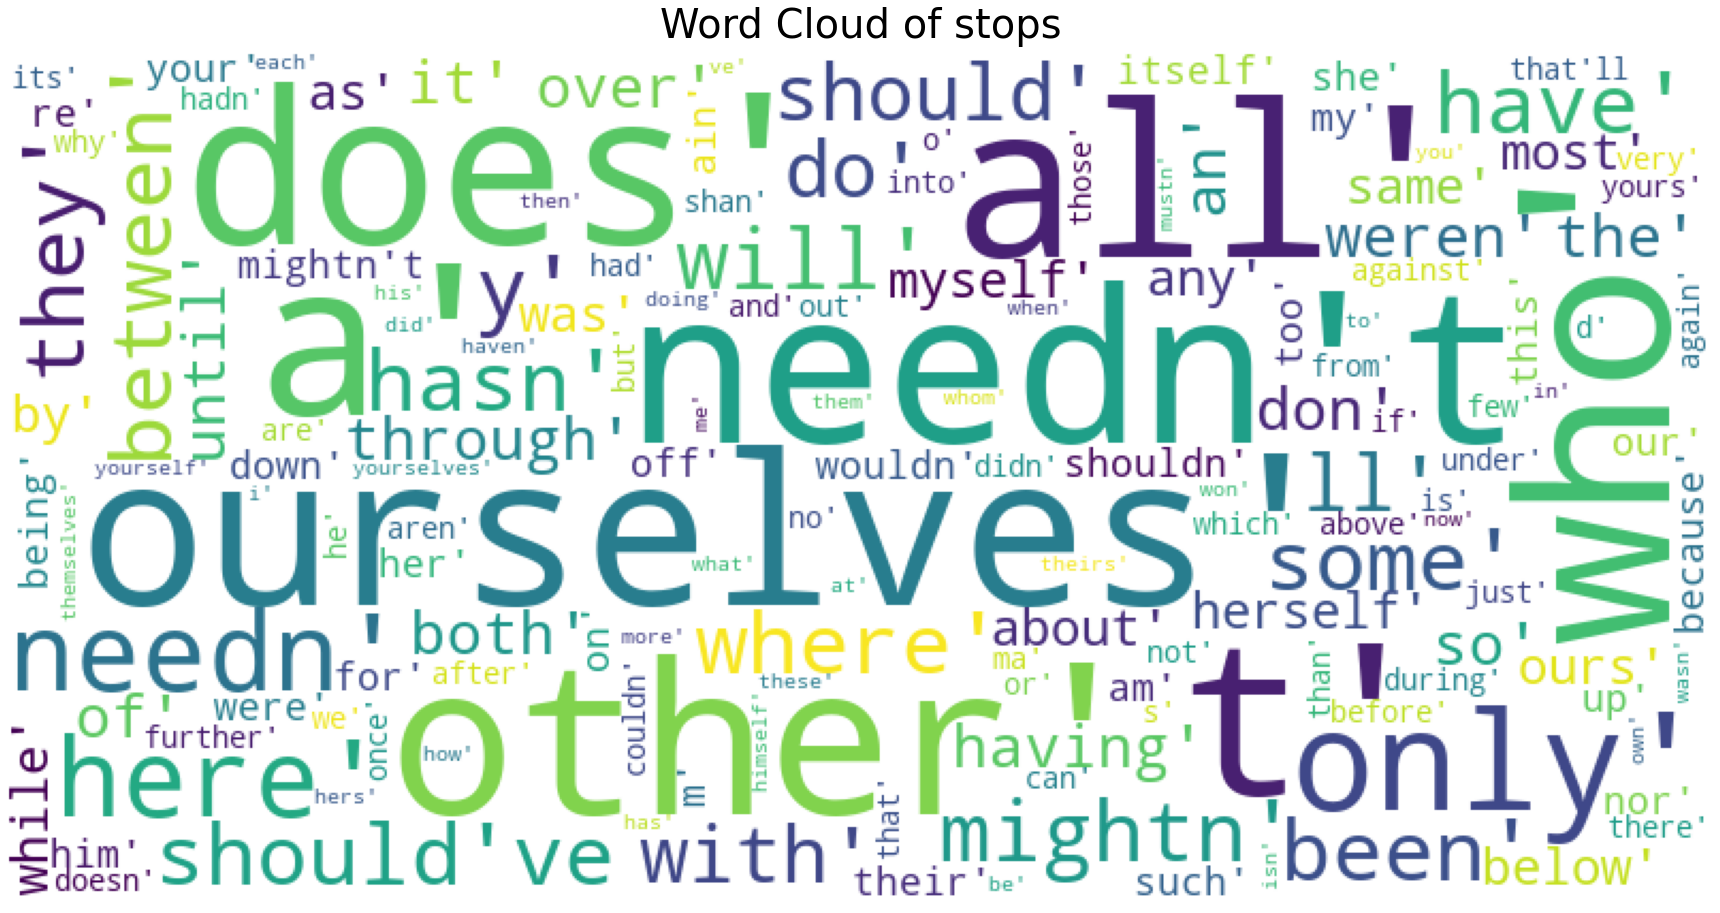

In [119]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stops, title="Word Cloud of stops")

In [64]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [65]:
stemmer = SnowballStemmer('english')
import re
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [126]:
%time df['review_clean'] = df['review'].apply(review_to_words)

Wall time: 1min 41s


In [130]:
# df.to_csv('clean_data.csv',index = False)

# ==============================================================

In [66]:
data = pd.read_csv('clean_data.csv')
data.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  \
0       May 20, 2012           27   
1     April 27, 2010          192   
2  December 14, 2009           17   
3   November 3, 2015           10   
4  November 27, 2016           37   

                                        review_clean  
0      no side effect take combin bystol mg fish oil  
1  son halfway fourth week intuniv becam concern ...  
2  use take anoth oral contracept pill cycl happi...  
3  first time use form birth control glad went pa...  
4  suboxon complet turn life around feel healthie...

In [67]:
data['review_clean'] = data['review_clean'].astype(str)

In [68]:
data.loc[(data['rating'] >= 8), 'Review_Sentiment'] = 'Positive'
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 'Negative'
data.loc[((data['rating']  >= 5) & (data['rating'] <= 7)), 'Review_Sentiment'] = 'Neutral'

data['Review_Sentiment'].value_counts()

Positive    96489
Negative    39739
Neutral     23583
Name: Review_Sentiment, dtype: int64

In [69]:
train = data.rename(columns={'review_clean':'review_body','Review_Sentiment':'sentiment'})

In [70]:
train.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  \
0       May 20, 2012           27   
1     April 27, 2010          192   
2  December 14, 2009           17   
3   November 3, 2015           10   
4  November 27, 2016           37   

                                         review_body sentiment  
0      no side effect take combin bystol mg fish oil  Positive  
1  son halfway fourth week intuniv becam concern ...  Positive  
2  use take anoth oral contracept pill cycl happi...   Neutral  
3  first time use form birth control glad went pa...  Positive  
4  suboxon complet turn life around feel healthie...  Positive

In [80]:
# df1 = train[['condition','review_body','rating','sentiment']].sample(n=2000,random_state=1)
# df1.to_csv('df1.csv',index=False)

In [82]:
df1 = pd.read_csv('df1.csv')
df1.tail(2)

condition                                        review_body  \
1998  Ovulation Induction  tri order start famili pretti aw eye problem t...   
1999                 Acne  prescrib main clear clog pore forehead around ...   

      rating sentiment  
1998     8.0  Positive  
1999     5.0   Neutral

In [91]:
import dash
import dash_table
from jupyter_dash import JupyterDash
import pandas as pd
from collections import OrderedDict

app = JupyterDash(__name__)

df1['id'] = df1.index

app.layout = dash_table.DataTable(
    style_data={
        'whiteSpace': 'normal',
        'height': 'auto',
    },
    data=df1.to_dict('records'),
    sort_action='native',
    columns=[
        {'name': 'review_body', 'id': 'review_body', 'type': 'text', 'editable': False},
        {'name': 'sentiment', 'id': 'sentiment', 'type': 'text', 'editable': False},
        {'name': 'condition', 'id': 'condition', 'type': 'text', 'editable': False},
        {'name': 'rating', 'id': 'rating', 'type': 'text', 'editable': False},

    ],
    editable=True,
    style_data_conditional=[
        {
            'if': {
                'filter_query': '{sentiment} = "Positive"',
                'column_id': 'sentiment'
            },
            'color': 'green'
        },
        {
            'if': {
                'filter_query': '{sentiment} = "Negative"',
                'column_id': 'sentiment'
            },
            'color': 'red'
        },
        {
            'if': {
                'filter_query': '{sentiment} = "Neutral"',
                'column_id': 'sentiment'
            },
            'color': '#FFC300'
        },
        
    ]
)

if __name__ == '__main__':
    app.run_server(mode='inline', height=500, width='100%', port=8051)

In [16]:
temp = train.groupby('sentiment').count()['review_body'].reset_index().sort_values(by='review_body',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.review_body,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [19]:
data

drugName                     condition  \
0                      Valsartan  Left Ventricular Dysfunction   
1                     Guanfacine                          ADHD   
2                         Lybrel                 Birth Control   
3                     Ortho Evra                 Birth Control   
4       Buprenorphine / naloxone             Opiate Dependence   
...                          ...                           ...   
159806                   Campral            Alcohol Dependence   
159807            Metoclopramide               Nausea/Vomiting   
159808                   Orencia          Rheumatoid Arthritis   
159809        Thyroid desiccated           Underactive Thyroid   
159810              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
159806  "I wrote my first report in Mid-October of 201...    10.0   
159807  "I was given this in IV before surgey. I immed...     1.0   
159808  "Limited improvement after 4 months, developed...     2.0   
159809  "I&#039;ve been on thyroid medication 49 years...    10.0   
159810  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  \
0             May 20, 2012           27   
1           April 27, 2010          192   
2        December 14, 2009           17   
3         November 3, 2015           10   
4        November 27, 2016           37   
...                    ...          ...   
159806        May 31, 2015          125   
159807    November 1, 2011           34   
159808      March 15, 2014           35   
159809  September 19, 2015           79   
159810   December 13, 2014          116   

                                             review_clean Review_Sentiment  
0           no side effect take combin bystol mg fish oil         Positive  
1       son halfway fourth week intuniv becam concern ...         Positive  
2       use take anoth oral contracept pill cycl happi...          Neutral  
3       first time use form birth control glad went pa...         Positive  
4       suboxon complet turn life around feel healthie...         Positive  
...                                                   ...              ...  
159806  wrote first report mid octob not alcohol sinc ...         Positive  
159807  given iv surgey immedi becam anxious could not...         Negative  
159808  limit improv month develop bad rash md refus c...         Negative  
159809  thyroid medic year spent first synthroid vario...         Positive  
159810  chronic constip adult life tri linzess work mo...         Positive  

[159811 rows x 8 columns]

In [32]:
train.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  \
0       May 20, 2012           27   
1     April 27, 2010          192   
2  December 14, 2009           17   
3   November 3, 2015           10   
4  November 27, 2016           37   

                                         review_body sentiment  
0      no side effect take combin bystol mg fish oil  Positive  
1  son halfway fourth week intuniv becam concern ...  Positive  
2  use take anoth oral contracept pill cycl happi...   Neutral  
3  first time use form birth control glad went pa...  Positive  
4  suboxon complet turn life around feel healthie...  Positive

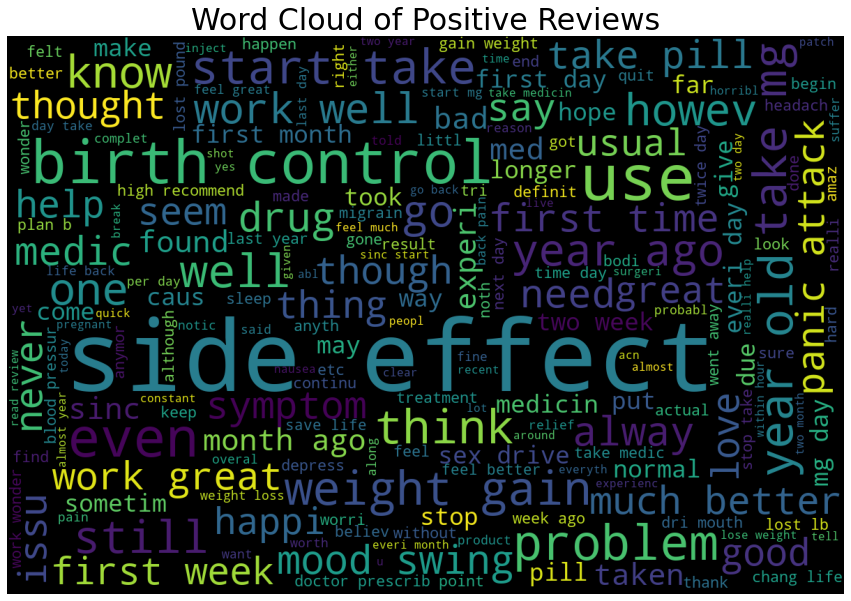

In [33]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in train['review_body'][train['sentiment'] == 'Positive']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

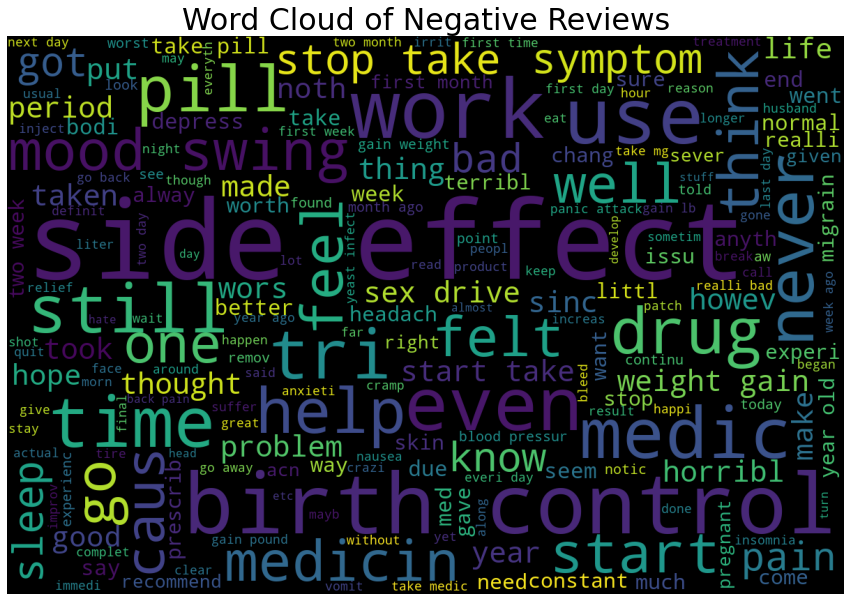

In [35]:
# making Words cloud for the Negative sentiments

positive_sentiments = " ".join([text for text in train['review_body'][train['sentiment']== 'Negative']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

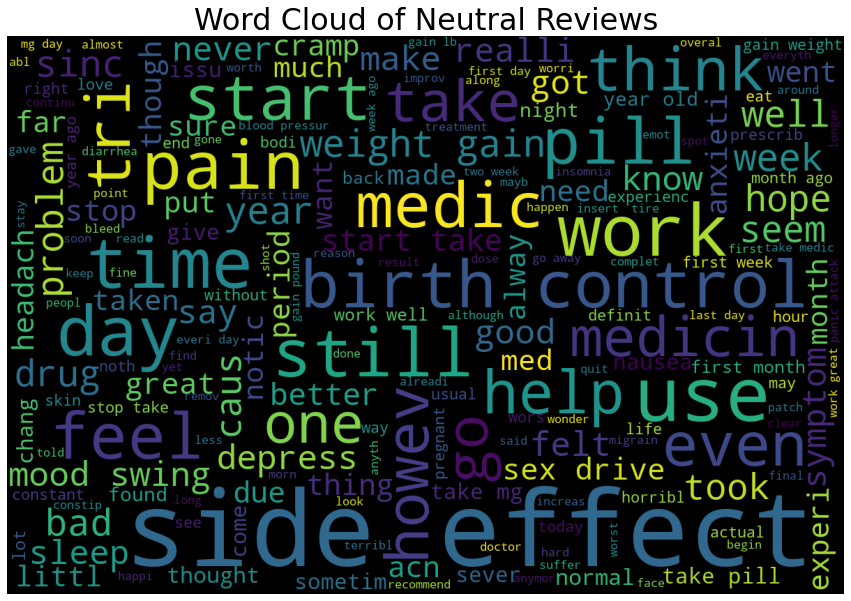

In [36]:
# making Words cloud for the Neutral sentiments

positive_sentiments = " ".join([text for text in train['review_body'][train['sentiment'] == 'Neutral']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Neutral Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Top 20 {n} most frequnt words

In [38]:
from collections import Counter
train['temp_list'] = train['review_body'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(40))
temp.columns = ['Common_words','count']
temp

Common_words  count
0           day  97795
1          take  97571
2           not  84922
3         month  69818
4          year  66021
5        effect  63849
6          work  62023
7            no  59626
8          week  58547
9           get  57822
10        start  56935
11         pain  54838
12         side  53522
13         feel  52438
14         time  50866
15           mg  45232
16        first  44732
17         like  43220
18         pill  41451
19          use  40443
20       period  40217
21          tri  37183
22         help  35662
23           go  34469
24        would  33185
25        medic  33093
26          one  31573
27         back  31543
28       doctor  31407
29         also  28043
30         took  27867
31       weight  27473
32          got  27021
33      medicin  25343
34         life  25286
35         sinc  25236
36          bad  25158
37         stop  24985
38        still  24380
39      anxieti  23960

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(temp, x="count", y="Common_words", title='Top 40 most common words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [40]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

# Most Common Word Sentiment Wise

In [41]:
Positive_sent = train[train['sentiment']=='Positive']
Negative_sent = train[train['sentiment']=='Negative']
Neutral_sent = train[train['sentiment']=='Neutral']

# MosT common positive words

In [42]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(40))
temp_positive.columns = ['Common_words','count']

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [43]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

# Most common Negative words

In [44]:
#MosT common Negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(40))
temp_negative.columns = ['Common_words','count']

fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

# MosT common Neutral words

In [45]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(40))
temp_neutral.columns = ['Common_words','count']

fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

# Let's Look at Unique Words in each Segment

In [51]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [52]:
%%time
raw_text = [word for word_list in train['temp_list'] for word in word_list]

Wall time: 390 ms


# Positive

In [53]:
%%time
Unique_Positive= words_unique('positive', 40, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:
Wall time: 1h 25min 54s


In [54]:
Unique_Positive

Empty DataFrame
Columns: [words, count]
Index: []

In [ ]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [68]:
main_df = data[['review','Review_Sentiment']]

In [69]:
mm = main_df.reset_index().drop('index',1).sample(n=50)
mm = mm.reset_index().drop('index',1)
mm


review Review_Sentiment
0   "I absolutely LOVE my Skyla Iud. I first got i...         Positive
1   "Did not work for me. Was having some side eff...         Negative
2   "Ive been taking Dexilant for 3 months. Now I ...         Positive
3   "I have had AMAZING results using Ziana Gel ov...         Positive
4   "I&#039;ve decided this was the best option fo...         Positive
5   "Well I&#039;m an 18 year old senior girl in h...         Negative
6   "I&#039;ve taken Stribild for a month now. Aft...         Positive
7   "This shot is no good.\r\nI gave birth on aug....         Negative
8   "I&#039;ve had chronic migraines for around 12...         Positive
9   "I got it about a month ago and it was quick a...         Positive
10  "I was on Trinessa for a little under a year. ...         Negative
11  "I&#039;ve had the nexplanon for about 9 month...         Negative
12  "So, this is my 4th colonoscopy at the age of ...         Positive
13  "I&#039;m 57 years old and I&#039;ve been a di...         Positive
14  "So I started bc yesterday... no joke I&#039;m...         Negative
15  "I was on Lutera for 3 years and it was awesom...         Positive
16  "My 8 yr old has been on the meds for 3 days n...          Neutral
17  "I&#039;ve been using Lumigan for about 12 yea...         Positive
18  "I have had two kids, don&#039;t know if that ...         Positive
19  "After I had my son I decided to try Implanon....         Positive
20  "I was 7 yrs old when I starting with tics &am...         Negative
21  "My doctor gave me this for anxiety and depres...         Negative
22  "I got two shots and went into labor next week...         Negative
23  "I have constant mid-level depression and have...          Neutral
24  "I have taken 50mg of trazodone with 7.5mg of ...         Positive
25  "I just got home from an emergency appointment...         Negative
26  "I used this medicine to help me fall asleep. ...         Negative
27  "Where do I start? I&#039;m 22 years old and I...         Negative
28  "This medication was perscriped as treatment f...         Positive
29  "Here&#039;s my situation: female, mid 30&#039...         Positive
30  "I have used Clonazepam for about a year now. ...         Positive
31  "I was unaware that I was suffering with OCD f...         Positive
32  "I am taking 70 mg of Vyvanse and also taking ...         Positive
33  "I wasn&#039;t near as nervous as I shouldve b...          Neutral
34  "My father died of colon cancer. Even so, last...         Negative
35  "Stops further outbreak, reduces inflammation,...         Positive
36  "I wish I could say the taste was the worst pa...         Positive
37  "OxyContin allowed me to recover from cancer s...         Positive
38  "Ativan has a troublesome history of abuse and...         Positive
39  "I have a hard time believing that there are s...         Positive
40  "Amazing medicine. Helped with my recently dia...         Positive
41  "I just started this birth control Feb.1,2017....         Negative
42  "I&#039;ve been on the ring since February. At...         Negative
43  "Before taking Effexor XR I was suicidal, cryi...         Positive
44  "I&#039;m glad there are reviews for Orthysia,...          Neutral
45  "I had mirena put in about 8 months ago.  So f...          Neutral
46  "I thank God for using this product! It is ama...         Positive
47  "Great for anxiety. I find that I like life a ...          Neutral
48  "Prep for my colonospy. Mixed them together wi...         Positive
49  "I take 3 x 25 mg tablets twice a day to preve...         Positive

In [70]:
mm['id'] = mm.index
mm

review Review_Sentiment  id
0   "I absolutely LOVE my Skyla Iud. I first got i...         Positive   0
1   "Did not work for me. Was having some side eff...         Negative   1
2   "Ive been taking Dexilant for 3 months. Now I ...         Positive   2
3   "I have had AMAZING results using Ziana Gel ov...         Positive   3
4   "I&#039;ve decided this was the best option fo...         Positive   4
5   "Well I&#039;m an 18 year old senior girl in h...         Negative   5
6   "I&#039;ve taken Stribild for a month now. Aft...         Positive   6
7   "This shot is no good.\r\nI gave birth on aug....         Negative   7
8   "I&#039;ve had chronic migraines for around 12...         Positive   8
9   "I got it about a month ago and it was quick a...         Positive   9
10  "I was on Trinessa for a little under a year. ...         Negative  10
11  "I&#039;ve had the nexplanon for about 9 month...         Negative  11
12  "So, this is my 4th colonoscopy at the age of ...         Positive  12
13  "I&#039;m 57 years old and I&#039;ve been a di...         Positive  13
14  "So I started bc yesterday... no joke I&#039;m...         Negative  14
15  "I was on Lutera for 3 years and it was awesom...         Positive  15
16  "My 8 yr old has been on the meds for 3 days n...          Neutral  16
17  "I&#039;ve been using Lumigan for about 12 yea...         Positive  17
18  "I have had two kids, don&#039;t know if that ...         Positive  18
19  "After I had my son I decided to try Implanon....         Positive  19
20  "I was 7 yrs old when I starting with tics &am...         Negative  20
21  "My doctor gave me this for anxiety and depres...         Negative  21
22  "I got two shots and went into labor next week...         Negative  22
23  "I have constant mid-level depression and have...          Neutral  23
24  "I have taken 50mg of trazodone with 7.5mg of ...         Positive  24
25  "I just got home from an emergency appointment...         Negative  25
26  "I used this medicine to help me fall asleep. ...         Negative  26
27  "Where do I start? I&#039;m 22 years old and I...         Negative  27
28  "This medication was perscriped as treatment f...         Positive  28
29  "Here&#039;s my situation: female, mid 30&#039...         Positive  29
30  "I have used Clonazepam for about a year now. ...         Positive  30
31  "I was unaware that I was suffering with OCD f...         Positive  31
32  "I am taking 70 mg of Vyvanse and also taking ...         Positive  32
33  "I wasn&#039;t near as nervous as I shouldve b...          Neutral  33
34  "My father died of colon cancer. Even so, last...         Negative  34
35  "Stops further outbreak, reduces inflammation,...         Positive  35
36  "I wish I could say the taste was the worst pa...         Positive  36
37  "OxyContin allowed me to recover from cancer s...         Positive  37
38  "Ativan has a troublesome history of abuse and...         Positive  38
39  "I have a hard time believing that there are s...         Positive  39
40  "Amazing medicine. Helped with my recently dia...         Positive  40
41  "I just started this birth control Feb.1,2017....         Negative  41
42  "I&#039;ve been on the ring since February. At...         Negative  42
43  "Before taking Effexor XR I was suicidal, cryi...         Positive  43
44  "I&#039;m glad there are reviews for Orthysia,...          Neutral  44
45  "I had mirena put in about 8 months ago.  So f...          Neutral  45
46  "I thank God for using this product! It is ama...         Positive  46
47  "Great for anxiety. I find that I like life a ...          Neutral  47
48  "Prep for my colonospy. Mixed them together wi...         Positive  48
49  "I take 3 x 25 mg tablets twice a day to preve...         Positive  49

In [71]:
import dash
import dash_table
import pandas as pd
from collections import OrderedDict



app = JupyterDash(__name__)

#df['id'] = df.index
mm['id'] = mm.index

app.layout = dash_table.DataTable(
    style_data={
        'whiteSpace': 'normal',
        'height': 'auto',
    },
    data=mm.to_dict('records'),
    sort_action='native',
    columns=[
                {'name': 'review', 'id': 'review', 'type': 'text', 'editable': False},
        {'name': 'Review_Sentiment', 'id': 'Review_Sentiment', 'type': 'text', 'editable': False},

    ],
    editable=True,
    style_data_conditional=[
        {
            'if': {
                'filter_query': '{Review_Sentiment} = "Positive"',
                'column_id': 'Review_Sentiment'
            },
            'color': 'green'
        },
        {
            'if': {
                'filter_query': '{Review_Sentiment} = "Negative"',
                'column_id': 'Review_Sentiment'
            },
            'color': 'red'
        },
        {
            'if': {
                'filter_query': '{Review_Sentiment} = "Neutral"',
                'column_id': 'Review_Sentiment'
            },
            'color': '#FFC300'
        },
        
    ]
)

if __name__ == '__main__':
    app.run_server(mode='inline', height=500, width='100%', port=8051)

In [75]:
df['drugName'].value_counts()

Levonorgestrel                           3657
Etonogestrel                             3336
Ethinyl estradiol / norethindrone        2850
Nexplanon                                2156
Ethinyl estradiol / norgestimate         2117
                                         ... 
Generlac                                    1
Acetaminophen / pamabrom / pyrilamine       1
Royal jelly                                 1
DermaZinc Shampoo                           1
Penicillamine                               1
Name: drugName, Length: 3436, dtype: int64

# Top 20 rating drug 10/10 ratings

In [95]:
def rating_drug(rate):
    top_10 = df[df.rating == rate]['drugName'].value_counts()[:20]
    fig = go.Figure()
    fig.add_bar(x=top_10.index,y=top_10)
    return fig.show()
rating_drug(4)

In [106]:
df[df.rating == 4]

drugName            condition  \
12                Pentasa      Crohn's Disease   
13       Dextromethorphan                Cough   
43            Venlafaxine           Depression   
47             Tamsulosin    Overactive Bladde   
80             Wellbutrin           Depression   
...                   ...                  ...   
159683  Gildess Fe 1 / 20        Birth Control   
159707       Tri-Sprintec        Birth Control   
159720     Lo Loestrin Fe        Birth Control   
159760            Doxepin             Insomnia   
159765         Metoprolol  High Blood Pressure   

                                                   review  rating  \
12      "I had Crohn&#039;s with a resection 30 years ...     4.0   
13      "Have a little bit of a lingering cough from a...     4.0   
43      "my gp started me on Venlafaxine yesterday to ...     4.0   
47      "24 Year Old, Male, UK ,Normally I would go ev...     4.0   
80      "Started taking it and I slept well at night a...     4.0   
...                                                   ...     ...   
159683  "I have been on this pill for a little over on...     4.0   
159707  "I&#039;ve been on these pills for 3 weeks now...     4.0   
159720  "Period wasn&#039;t as heavy as per usual but ...     4.0   
159760  "I read all the great comments here and talked...     4.0   
159765  "It is fourth blood pressure pill for me. It f...     4.0   

                     date  usefulCount  
12           July 6, 2013            8  
13      September 7, 2017            1  
43         April 27, 2016            3  
47        January 3, 2017           10  
80       January 13, 2017           15  
...                   ...          ...  
159683      June 26, 2016            2  
159707      July 11, 2016            3  
159720  November 11, 2011            6  
159760       May 15, 2011           23  
159765      July 15, 2009           39  

[4968 rows x 6 columns]

In [102]:
top_10 = df[df.rating == 4]['drugName'].value_counts()[:20]
top_10

Etonogestrel                          204
Ethinyl estradiol / norethindrone     138
Nexplanon                             124
Ethinyl estradiol / levonorgestrel    120
Ethinyl estradiol / norgestimate      118
Levonorgestrel                         97
Implanon                               67
Mirena                                 56
Drospirenone / ethinyl estradiol       45
Desogestrel / ethinyl estradiol        43
Venlafaxine                            41
Medroxyprogesterone                    41
NuvaRing                               40
Tioconazole                            40
Ethinyl estradiol / etonogestrel       36
Loestrin 24 Fe                         36
Gabapentin                             36
Depo-Provera                           35
Sertraline                             33
Bupropion / naltrexone                 31
Name: drugName, dtype: int64

In [101]:
top_10 = df[df.rating == 4]['drugName'].value_counts()[:20]
fig = go.Figure()
fig.add_bar(x=top_10.index,y=top_10)
fig.show()

<>:1: SyntaxWarning:

list indices must be integers or slices, not str; perhaps you missed a comma?

<>:1: SyntaxWarning:

list indices must be integers or slices, not str; perhaps you missed a comma?

<ipython-input-101-f890d1cbbd10>:1: SyntaxWarning:

list indices must be integers or slices, not str; perhaps you missed a comma?



TypeError: list indices must be integers or slices, not str

In [98]:
top_10

Etonogestrel                          204
Ethinyl estradiol / norethindrone     138
Nexplanon                             124
Ethinyl estradiol / levonorgestrel    120
Ethinyl estradiol / norgestimate      118
Levonorgestrel                         97
Implanon                               67
Mirena                                 56
Drospirenone / ethinyl estradiol       45
Desogestrel / ethinyl estradiol        43
Venlafaxine                            41
Medroxyprogesterone                    41
NuvaRing                               40
Tioconazole                            40
Ethinyl estradiol / etonogestrel       36
Loestrin 24 Fe                         36
Gabapentin                             36
Depo-Provera                           35
Sertraline                             33
Bupropion / naltrexone                 31
Name: drugName, dtype: int64

# Top 20 drugs with 1/10 ratings

In [92]:
top_20_worse = df[df.rating == 1.0]['drugName'].value_counts()[:20]
fig = go.Figure()
fig.add_bar(x=top_20_worse.index,y=top_20_worse,title=f"{stock_name} open price")
fig.show()